In [1]:
# This script illustrates how to solve a simple regression task using Python and scikit-learn. 

%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline.
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

# load dataset
boston = datasets.load_boston()
y = boston.target

In [2]:
## Build model
lr = linear_model.LinearRegression()

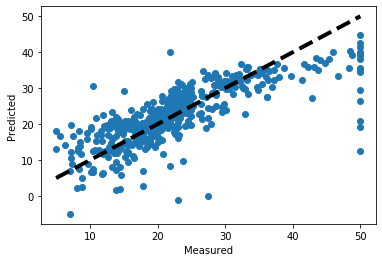

In [3]:
## Prediction Error Visualization
# This example shows how to use cross_val_predict to visualize prediction errors.

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [6]:
# Cross-validated estimators
# The best model is selected by cross-validation.

## Build model
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes, y_diabetes)

# The estimator chose automatically its lambda:
print(lasso.alpha_)

0.003753767152692203


In [16]:
# Find the P-value for coefficients
# Use stats.summary(model,x_train,y_train)
from regressors import stats
stats.summary(lasso.fit(X_diabetes, y_diabetes),X_diabetes, y_diabetes)

Residuals:
      Min       1Q  Median      3Q      Max
-151.7899 -38.5521   1.375 38.8188 154.7088


Coefficients:
              Estimate  Std. Error  t value   p value
_intercept  152.133484    2.544461  59.7901  0.000000
x1           -6.496845   58.077261  -0.1119  0.910981
x2         -235.996405   58.894551  -4.0071  0.000072
x3          521.738543   63.519560   8.2138  0.000000
x4          321.066892   62.552351   5.1328  0.000000
x5         -569.442684  312.470355  -1.8224  0.069073
x6          302.456279  234.530715   1.2896  0.197857
x7           -0.000000  136.747964  -0.0000  1.000000
x8          143.699567  135.829218   1.0579  0.290661
x9          669.926331  105.914725   6.3251  0.000000
x10          66.834304   63.581539   1.0512  0.293761
---
R-squared:  0.51742,    Adjusted R-squared:  0.50623
F-statistic: 46.21 on 10 features


In [5]:
ridge = linear_model.RidgeCV()
ridge.fit(X_diabetes, y_diabetes)
print(ridge.alpha_)

0.1
